In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

In [115]:
df=pd.read_csv('Petrol_consumption_1.csv')

In [116]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence,Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [117]:
df.dtypes

Petrol_tax                   float64
Average_income                 int64
Paved_Highways                 int64
Population_Driver_licence    float64
Petrol_Consumption             int64
dtype: object

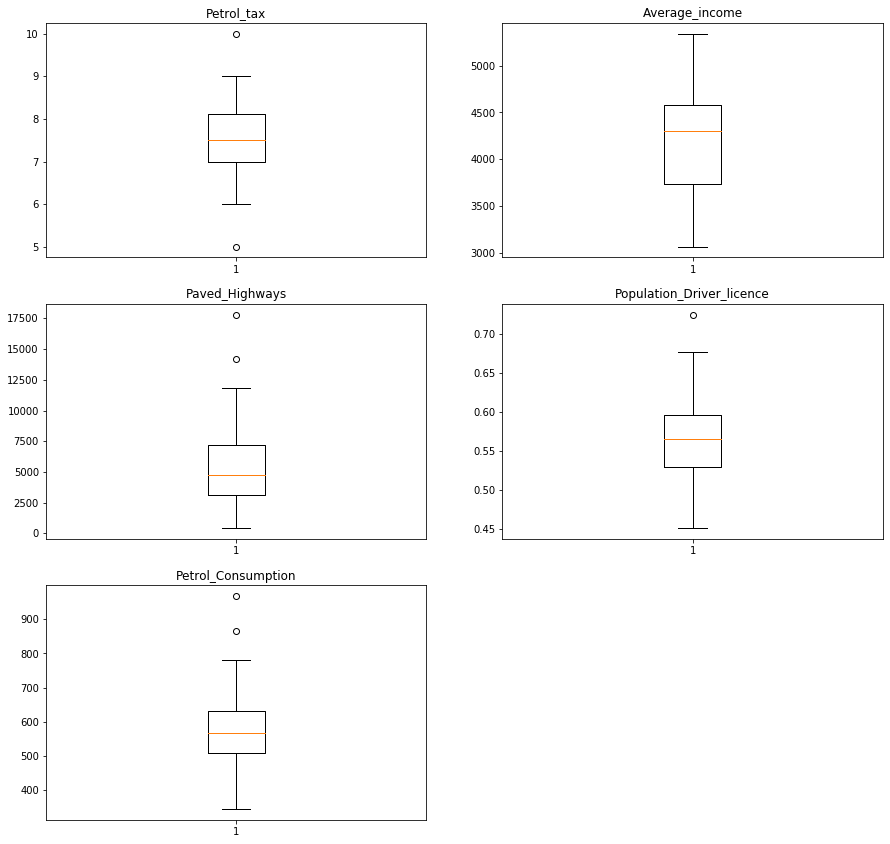

In [118]:
plt.figure(figsize=(15,25))
count=1
for col in df:
    plt.subplot(5,2,count)
    plt.boxplot(df[col])
    plt.title(col)
    count+=1
plt.show()

In [119]:
df1=df

In [120]:
df1.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence,Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [121]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence,Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [122]:
minthr,maxthr = df1.Petrol_tax.quantile([0.001,0.999])
minthr,maxthr

(5.047, 9.953000000000003)

In [123]:
df2=df1[(df1.Petrol_tax < maxthr)&(df1.Petrol_tax > minthr)]

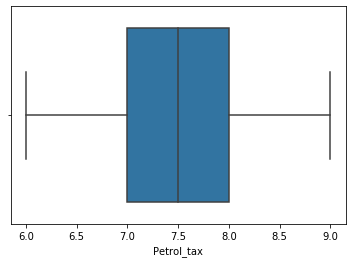

In [124]:
ax = sns.boxplot(x=df2["Petrol_tax"])

In [125]:
minthr,maxthr = df2.Paved_Highways.quantile([0.001,0.999])
minthr,maxthr

(438.69499999999994, 14081.690000000013)

In [126]:
df3=df2[(df2.Paved_Highways < maxthr)&(df2.Paved_Highways > minthr)]

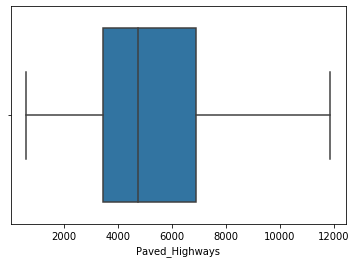

In [127]:
ax = sns.boxplot(x=df3["Paved_Highways"])

In [128]:
minthr,maxthr = df3.Population_Driver_licence.quantile([0.001,0.999])
minthr,maxthr


(0.452548, 0.7219790000000005)

In [129]:
df4=df3[(df3.Population_Driver_licence < maxthr)&(df3.Population_Driver_licence > minthr)]

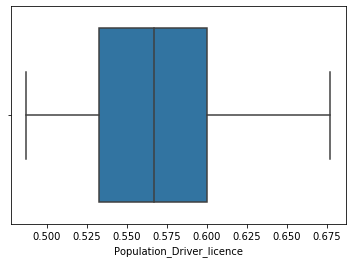

In [130]:
ax = sns.boxplot(x=df4["Population_Driver_licence"])

In [131]:
minthr,maxthr = df4.Petrol_Consumption.quantile([0.001,0.999])
minthr,maxthr

(415.886, 960.3740000000006)

In [132]:
df5=df4[(df4.Petrol_Consumption < maxthr)&(df4.Petrol_Consumption > minthr)]

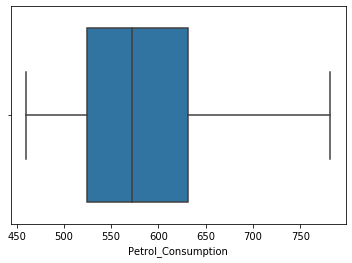

In [133]:
ax = sns.boxplot(x=df5["Petrol_Consumption"])

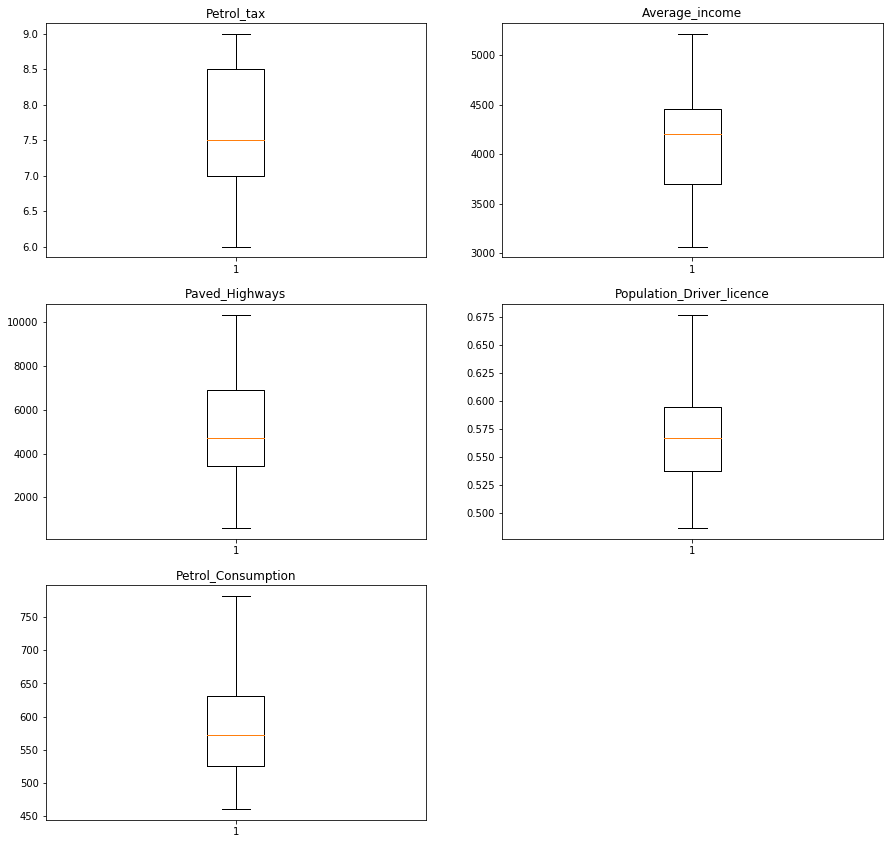

In [134]:
plt.figure(figsize=(15,25))
count=1
for col in df5:
    plt.subplot(5,2,count)
    plt.boxplot(df5[col])
    plt.title(col)
    count+=1
plt.show()

In [135]:
df5.shape

(40, 5)

In [136]:
df5.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence,Petrol_Consumption
Petrol_tax,1.000000,-0.133573,-0.461213,-0.321309,-0.511497
Average_income,-0.133573,1.000000,-0.022738,0.342022,-0.190037
Paved_Highways,-0.461213,-0.022738,1.000000,0.095436,0.086953
Population_Driver_licence,-0.321309,0.342022,0.095436,1.000000,0.545209
Petrol_Consumption,-0.511497,-0.190037,0.086953,0.545209,1.000000


In [137]:
x=df5.iloc[:,:-1]
y=df5.iloc[:,-1]

In [138]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
multiple=LinearRegression()
multiple.fit(x_train,y_train)

LinearRegression()

In [140]:
predictions=multiple.predict(x_test)
predictions

array([529.42272701, 423.53241738, 554.24745185, 642.80504361,
       491.42362542, 606.91580025, 506.51880627, 620.66414595,
       552.26173653, 505.58230082, 600.42805753, 619.21852019])

In [141]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
score=r2_score(y_test,predictions)
score

0.39779821780687663

In [142]:
mse=cross_val_score(multiple,x,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-3308.8846700223703


In [153]:
multiple1=LogisticRegression()
multiple1.fit(x_train,y_train)

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [154]:
prediction=multiple1.predict(x_test)
prediction

array([534, 460, 524, 644, 498, 534, 648, 534, 498, 640, 498, 571],
      dtype=int64)

In [155]:
rscrlo=r2_score(y_test,prediction)
rscrlo

-0.4447814917487918

In [168]:
# cv=RepeatedKFold(n_splits=20,n_repeats=5,random_state=1)
#grid=dict()
#grid['alpha']=np.arange(0,1,0.1)
#ridge=Ridge()
#ridge_regre=GridSearchCV(ridge,grid,scoring='neg_mean_absolute_error',cv=cv,n_jobs=1)
#ridge_regre.fit(x,y)
ridge=Ridge()
parameters={'alpha':[1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [169]:
prediction_ridge=ridge_regressor.predict(x_test)

In [170]:
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_test,prediction_ridge)
rscr=r2_score(y_test,prediction_ridge)
print(mse)
print(rscr)

1921.2265791694456
0.5538451172482746


In [171]:
lasso=Lasso()
parameters={'alpha':[1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x,y)

NameError: name 'Lasso' is not defined